In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras 

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [7]:
class_names = ["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [8]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


In [9]:
import matplotlib.pyplot as plt

In [10]:
X_train_n = X_train_full/255.
X_test_n=X_test/255.

In [11]:
X_valid , X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

c:\Users\HITECH\Desktop\Image processing\kapda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     1,622,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,654,130 (6.31 MB)

 Trainable params: 1,654,130 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
model_history = model.fit(X_train,y_train,epochs=20,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.7904 - loss: 0.5812 - val_accuracy: 0.8914 - val_loss: 0.3035
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.8984 - loss: 0.2761 - val_accuracy: 0.9016 - val_loss: 0.2652
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9189 - loss: 0.2218 - val_accuracy: 0.9066 - val_loss: 0.2583
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9304 - loss: 0.1885 - val_accuracy: 0.9132 - val_loss: 0.2401
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9396 - loss: 0.1593 - val_accuracy: 0.9162 - val_loss: 0.2421
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9484 - loss: 0.1356 - val_accuracy: 0.9166 - val_loss: 0.2432
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.9588 - loss: 0.1124 - val_accuracy: 0.9228 - val_loss: 0.2602
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9671 - loss: 0.0894 - 

In [21]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9046 - loss: 0.6072


[0.5890650153160095, 0.9054999947547913]

In [22]:
import pandas as pd

<Axes: >

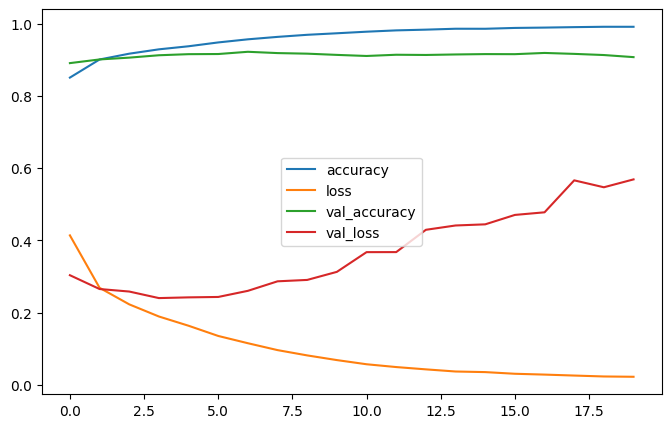

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))

In [25]:
X_new = X_test[:3]

In [29]:
y_pred = np.argmax(X_new)
y_pred

577

In [30]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(shape=(28, 28))


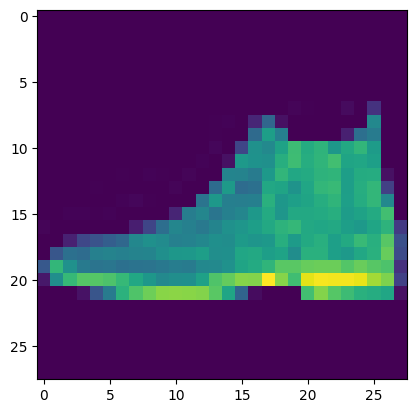

In [31]:
print(plt.imshow(   X_test[0].reshape(28,28)))

In [32]:
keras.backend.clear_session

<function keras.src.backend.common.global_state.clear_session(free_memory=True)>

In [33]:
del model

Architecture- pooling vs non pooling

In [34]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))

model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))

model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))



c:\Users\HITECH\Desktop\Image processing\kapda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model_a.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │     1,622,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,654,130 (6.31 MB)

 Trainable params: 1,654,130 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_b.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │     6,489,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,521,330 (24.88 MB)

 Trainable params: 6,521,330 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [38]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5912 - loss: 1.2621 - val_accuracy: 0.7626 - val_loss: 0.6167
Epoch 2/3
860/860 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7929 - loss: 0.5690 - val_accuracy: 0.7890 - val_loss: 0.5917
Epoch 3/3
860/860 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8224 - loss: 0.4901 - val_accuracy: 0.8560 - val_loss: 0.4349


In [39]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6410 - loss: 1.0877 - val_accuracy: 0.7716 - val_loss: 0.6458
Epoch 2/3
860/860 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8153 - loss: 0.5116 - val_accuracy: 0.7524 - val_loss: 0.6473
Epoch 3/3
860/860 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8381 - loss: 0.4511 - val_accuracy: 0.8410 - val_loss: 0.4416


In [42]:
import pandas as pd

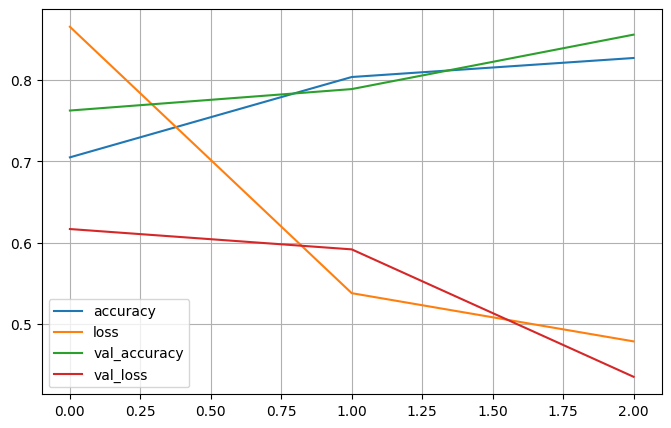

In [45]:

pd.DataFrame(model_history_a.history).plot(figsize=(8,5))
plt.grid("True")

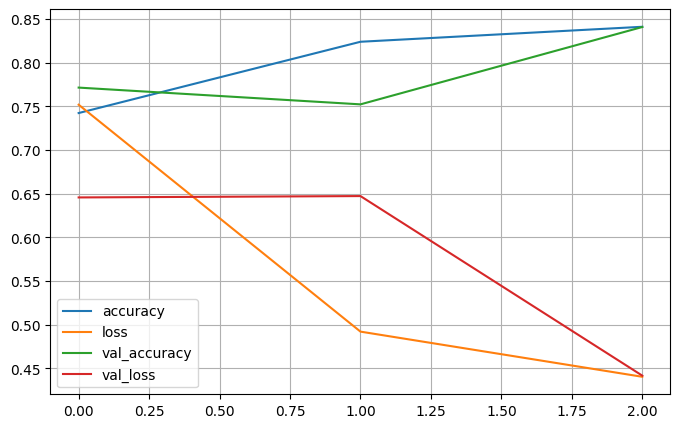

In [46]:
pd.DataFrame(model_history_b.history).plot(figsize=(8,5))
plt.grid("True")